In [58]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import csv
import time
import scipy.stats as st
from scipy.stats import linregress


In [59]:
## Output File (CSV)
data_file_day = "archive/day.csv"
data_file_hour="archive/hour.csv"
#Creating DataFrame
Bike_Share_Day=pd.read_csv(data_file_day)
Bike_Share_Hour=pd.read_csv(data_file_hour)
print(Bike_Share_Day.head())
print(Bike_Share_Hour.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

# Time of day vs Bike Rentals

In [60]:
#Checking if the Time of the day affetcs Bike Rentals
Bike_Hour_Count=Bike_Share_Hour.groupby(Bike_Share_Hour['hr']).sum()['cnt']
Bike_Hour_Count_df=pd.DataFrame({'Bikes Count':Bike_Hour_Count})
Bike_Hour_Count_df

,Bikes Count
hr,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171
8,261001


In [61]:
#For TTest
#Bike_Hour_df=Bike_Share_Hour.groupby(Bike_Share_Hour['hr']).sum()['cnt']
#Bike_Hour_df=pd.DataFrame({'Bike Count':Bike_Hour_df})
#Bike_Hour_df=Bike_Hour_df.reset_index()
#Bike_Hour_df

In [62]:
#Checking for the hour of day with minimum Bike Rentals
Bike_Hour_Count_df.loc[Bike_Hour_Count_df['Bikes Count']==Bike_Hour_Count_df['Bikes Count'].min()]

,Bikes Count
hr,
4,4428


In [63]:
#Checking for the hour of day with maximum Bike Rentals
Bike_Hour_Count_df.loc[Bike_Hour_Count_df['Bikes Count']==Bike_Hour_Count_df['Bikes Count'].max()]

,Bikes Count
hr,
17,336860


# Plotting the Data

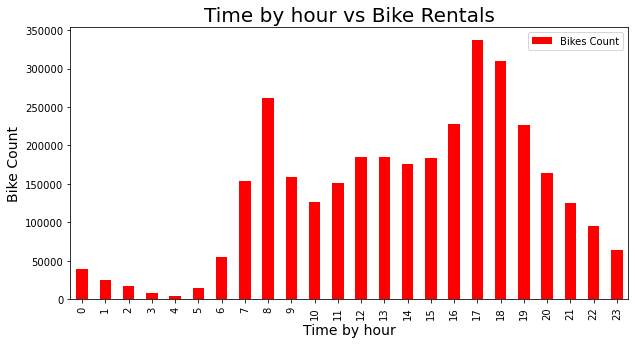

In [64]:
#Plotting the hour of day with Bike Rentals
Bike_Hour_Count_df.plot.bar(figsize=(10,5), color='r',fontsize = 10)
plt.xlabel("Time by hour",fontsize = 14)
plt.ylabel("Bike Count",fontsize = 14)
plt.title("Time by hour vs Bike Rentals",fontsize = 20)
plt.savefig('Output/barplot_Time_by_hour.png', bbox_inches = "tight")
plt.show()

# Weather patterns vs Bike Rentals

In [65]:
#Amber

# Seasons vs Bike Rentals

In [66]:
#Adding Season labels
Bike_Share_Season=Bike_Share_Hour.copy()
bins=[0,1,2,3,4]
group=['Spring','Summer','Fall','Winter']
Bike_Share_Season['Season Name']=pd.cut(Bike_Share_Season['season'],bins,labels=group,include_lowest=True)
Bike_Share_Season.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Season Name
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,Spring
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,Spring
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,Spring
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,Spring
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,Spring


In [67]:
#Bike_Spring=Bike_Share_Season.loc[Bike_Share_Season['Season Name']=='Spring']
#Bike_Spring.groupby(Bike_Spring['weathersit']).count()['cnt']

In [68]:
#Bike_Fall=Bike_Share_Season.loc[Bike_Share_Season['Season Name']=='Fall']
#Bike_Fall.groupby(Bike_Fall['weathersit']).count()['cnt']

In [69]:
#Bike_Summer=Bike_Share_Season.loc[Bike_Share_Season['Season Name']=='Summer']
#Bike_Summer.groupby(Bike_Summer['weathersit']).count()['cnt']

# Calculating number of bike rentals per season

In [70]:
Bike_Season_Count=Bike_Share_Season.groupby(Bike_Share_Season['Season Name']).sum()['cnt']
Bike_Season_Count_df=pd.DataFrame({'Bike Count':Bike_Season_Count})
#For TTest
Bike_df=Bike_Share_Season.groupby(Bike_Share_Season['season']).sum()['cnt']
Bike_df=pd.DataFrame({'Bike Count':Bike_df})
Bike_df=Bike_df.reset_index()
Bike_df

,season,Bike Count
0,1,471348
1,2,918589
2,3,1061129
3,4,841613


In [71]:
#Checking for the season with minimum Bike Rentals
Bike_Season_Count_df.loc[Bike_Season_Count_df['Bike Count']==Bike_Season_Count_df['Bike Count'].min()]

,Bike Count
Season Name,
Spring,471348


In [72]:
#Checking for the season with maximum Bike Rentals
Bike_Season_Count_df.loc[Bike_Season_Count_df['Bike Count']==Bike_Season_Count_df['Bike Count'].max()]

,Bike Count
Season Name,
Fall,1061129


# Bar chart

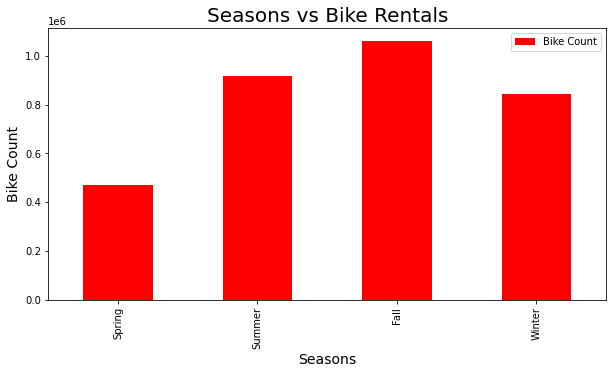

In [73]:
#Plotting the bike rental count per season
Bike_Season_Count_df.plot.bar(figsize=(10,5), color='r',fontsize = 10)
plt.xlabel("Seasons",fontsize = 14)
plt.ylabel("Bike Count",fontsize = 14)
plt.title("Seasons vs Bike Rentals",fontsize = 20)
plt.savefig('Output/barplot_Seasons.png', bbox_inches = "tight")
plt.show()

In [74]:
#Chisquared test
#st.ttest_ind(Bike_df['season'],Bike_df['Bike Count'],equal_var=False)
observed = pd.Series([471348, 918589, 1061129, 841613], index=["1", "2", "3", "4"])

# Create a data frame
df = pd.DataFrame([observed]).T

# Add a column whose default values are the expected values
df[3] = 823169

# Rename the columns
df.columns = ["observed", "expected"]

# View the data frame
df

,observed,expected
1,471348,823169
2,918589,823169
3,1061129,823169
4,841613,823169


In [75]:
criticalvalue=st.chi2.ppf(q=.95,df=3)
criticalvalue

7.814727903251179

In [76]:
st.chisquare(df['observed'],df['expected'])

Power_divergenceResult(statistic=230630.81235687932, pvalue=0.0)

# Weekday versus Weekend  Bike Rentals

In [ ]:
#Aurelian

# Holiday vs Bike Rentals

In [ ]:
#Aurelian